In [1]:
from Graph import Graph
import numpy as np
from random import randint
from time import time
from parserCities import get_matrice_from_file, get_cities_positions_from_file

In [2]:
g = Graph("./defi250.csv")

In [3]:
# 2) Construire la matrice de distance euclidienne entre les 250 villes
# (lire avec la librairie csv (à l’aide de csv.reader(open(‘defi250.csv’, ‘’r’’),delimiter=‘’;’’)))ou
# avec panda; mettre inf sur la diagonale).
print("graph is", g)
print(f"matrice distance is\n {g.matrice_distance}")

graph is Graph with 250 cities
matrice distance is
 [[       inf 0.35559909 0.43119766 ... 0.79051004 0.75212894 0.16799542]
 [0.35559909        inf 0.12325252 ... 0.43536819 0.52442678 0.41071041]
 [0.43119766 0.12325252        inf ... 0.39618735 0.60134649 0.51585625]
 ...
 [0.79051004 0.43536819 0.39618735 ...        inf 0.48576945 0.82117512]
 [0.75212894 0.52442678 0.60134649 ... 0.48576945        inf 0.67817143]
 [0.16799542 0.41071041 0.51585625 ... 0.82117512 0.67817143        inf]]


In [4]:
# 3) Construire le première permutation des villes de 0 à 249 (par exemple dans l’ordre
# Sigma=(0,1,2,3,…,249) et évaluer la fonction distance F(Sigma)
chemin_basic = [i for i in range(250)]
print("distance from 0 tp 249 is", g.get_distance(chemin_basic))

distance from 0 tp 249 is 134.8402613136102


In [5]:
# 4) Construire les 4 transformations locales
chemin_test = [i for i in range(5)]
print("chemin_test is", chemin_test)
# 4.1) Swap: échanger deux villes consécutives dans la permutation
print("swap 3 with next", g.swap_with_next(chemin_test, 3))
# 4.2) Insert: insérer une ville à une position donnée
print("insert 1 at 4", g.move_city_at(chemin_test, 1, 4))
# 4.3) SwapIndex: échanger deux villes à des positions données
print("swap 2 and 4", g.swap_indexes(chemin_test, 2, 4))
# 4.4) 2opt: inversement de l’ordre des villes entre deux positions données
print("2opt between 1 and 3", chemin_test,
      g.voisinage_2_opt(chemin_test, 4, 1))

chemin_test is [0, 1, 2, 3, 4]
swap 3 with next [0, 1, 2, 4, 3]
insert 1 at 4 [0 2 3 4 1]
swap 2 and 4 [0, 1, 4, 3, 2]
2opt between 1 and 3 [0, 1, 2, 3, 4] [0 1 3 2 4]


In [6]:
# 6) Choisir aléatoirement un élément dans le voisinage de Sigma associé à l’une des
# transformations locales.
l = randint(1, 250)
a = randint(0, l)
b = randint(0, l)

chemin = [i for i in range(l)]
voisin = g.voisinage_2_opt(chemin, a, b)
print(f"opt2 on a:{a} b:{b}", voisin)


opt2 on a:23 b:18 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 22 21 20 19 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [7]:
# petite digression sur un algo fait rapidement
chemin = [i for i in range(250)]
best_chemin = g.best_chemin_stupid(chemin, max_iter=2000)
print("best chemin is", best_chemin)
print("distance best chemin is", g.get_distance(best_chemin))

best chemin is [232  24  67  44  36  66 108 151 115 201 124 113   3  50 223  46  72  75
 190 214 146 101 167 109  37 150   6 153 222   5  32  58 227  39 110 221
  47 111  98 123 204  80 134  94 171  87 169 205 225 119  25 175 152 130
 184  78 207 129   1 185 168 131 140 230  17  91  95 236  86  19 155  92
  85 159 226  35   7 198 199 200  69  12 161 229 162 148 235  18   4  30
  13 189  89 106  68 241 173 202   0 156  71  49  84  52 143  60 158 224
 172 246 145  21  27  20  59  65 183 128  15  48 105 244  74  82 180 117
  64 141 178  26 144 187 220 136 154 104 209  99  79 181 219 196 239 137
  43   8  28 218 248  62  63 103 135 133 147 231  96  38  70 102  97 170
  11  77 114 107 247 238  33  56 116 165 210 203 193 160  51  61 206 182
 192 179  42  16  41  55 245  40 121 212  54 176 157 211 215  53  45  57
  83 186 177  23 208 188 139 243  81 142  22 195  90 127  14 149  10 237
 132 122  31 217 138 197  93   9 166 164 242 126 118  34  29 216 191 174
 125  76 240  88 213 163 112 234 233

In [8]:
# 9) On va construire une solution gloutonne, on part de la ville i, on rajoute la ville i dans une
# liste des villes déjà parcourue ensuite on va rajouter à la fin de la liste la ville non encore
# parcourue la plus proche de la ville i puis on part de la dernière ville rajoutée dans la liste et
# on rajoute à nouveau la ville non encore parcourue la plus proche et ainsi de suite pour
# obtenir Sigma
greedy = g.best_start_greedy()
print("distance greedy", g.get_distance(greedy))

distance greedy 14.181429278042408


In [9]:
# 10) Recuit simulé

recuit_simule = g.recuit_simule()
print("distance recuit_simule", g.get_distance(recuit_simule))

distance recuit_simule 13.805472967781359


In [10]:
# Faire tourner votre algorithme du recuit simulé sur la matrice des distances (par la route) entre les 532 villes.
g_532 = Graph(cities_position=get_cities_positions_from_file("./att532.tsp"))

In [11]:
# Donner votre optimum pour le cas d’un camion avec 532 villes.
best_greedy = g_532.best_start_greedy()
print("distance greedy", g_532.get_distance(best_greedy))
recuit_simule = g_532.recuit_simule()
print("distance recuit_simule", g_532.get_distance(recuit_simule))

distance greedy 102786.05065745956
distance recuit_simule 101372.22771228277


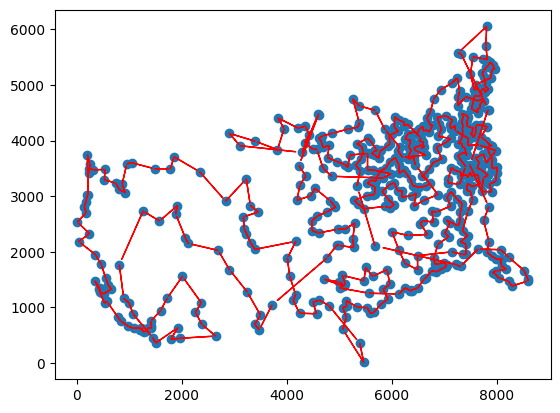

In [12]:
# Visualiser le parcours.
g_532.show_chemin(recuit_simule)

**Chercher dans votre solution une ville pour mettre le dépôt des camions**

Pour trouver une ville on calcule le centre de gravité des villes et on prend la ville la plus proche de ce centre de gravité.

In [18]:
# Donner une solution pour deux camions qui partent du dépôt et qui reviennent au dépôt en parcourant des villes distinctes (sauf la ville du dépôt).
paths = g_532.get_n_optimal_paths(2)

# Donner l’optimum pour le cas de deux camions.
distances = g_532.get_distances_multiple(paths)
total = sum(distances)
print(f"total distance for {len(paths)} trucks is {total}")

total distance for 2 trucks is 100685.51934377867


distance pour le camion red est 50491.449297747335
distance pour le camion pink est 50194.07004603133


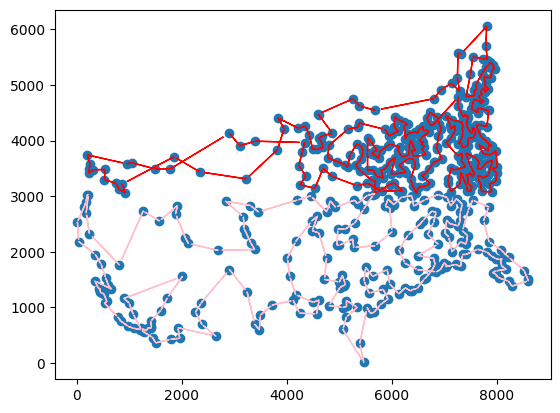

In [19]:
# # Visualiser les parcours en deux couleurs et donner la longueur de chaque tournée.
c=['red', 'pink', 'blue', 'yellow','orange', 'purple', 'brown', 'black']
for i in range(len(distances)):
    print(f"distance pour le camion {c[i%len(c)]} est {distances[i]}")

g_532.show_multiples_paths(paths, step=0, colors=c)


n=1, best distance=97158.55660025794
n=2, best distance=100896.01708816802
n=3, best distance=96021.67723065802
n=4, best distance=101095.46652753782
the most optimal path is with 3 trucks and is of 96021.67723065802 length


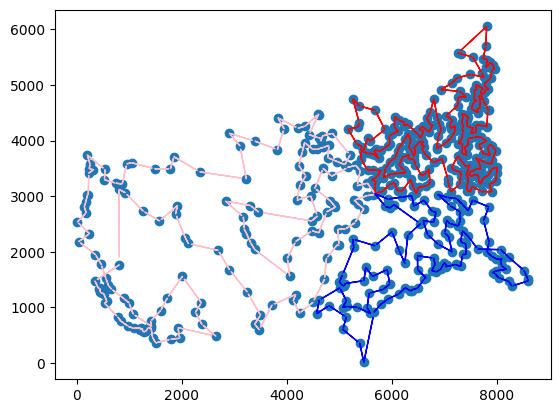

In [17]:
#trouver le nombre optimal de camions pour ce problème
paths = g_532.best_n_optimal_paths(max_n=5)
total = sum(g_532.get_distances_multiple(paths))
print(f"the most optimal path is with {len(paths)} trucks and is of {total} length")

g_532.show_multiples_paths(paths, step=0, colors=c)
